<a href="https://colab.research.google.com/github/lpitts235286/CS-4410/blob/main/Iris_KNN_Hyperparameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Core libraries
import numpy as np
import matplotlib.pyplot as plt

# Sklearn tools
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

In [2]:
iris = load_iris()
X, y = iris.data, iris.target

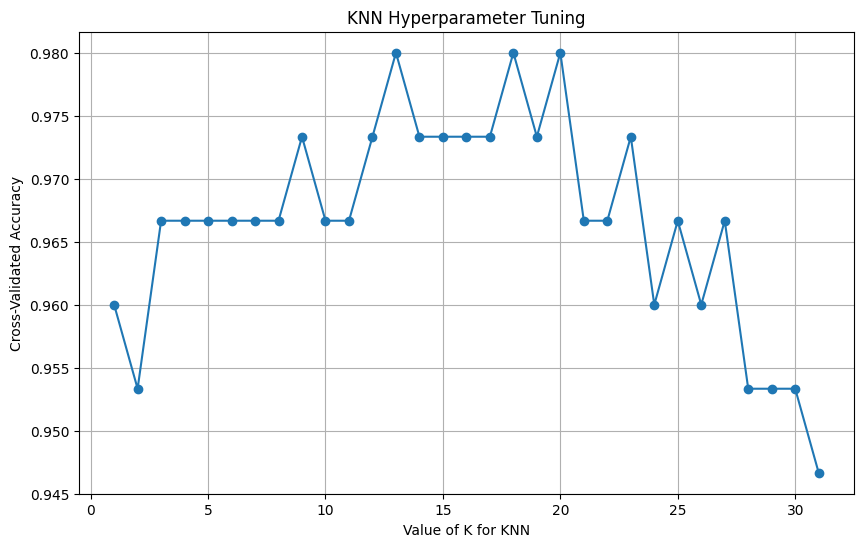

Best K value from cross-validation: 13


In [3]:
# Test K values from 1 to 31
k_range = range(1, 32)
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10)   # 10-fold CV
    cv_scores.append(scores.mean())

# Plot accuracy vs K
plt.figure(figsize=(10, 6))
plt.plot(k_range, cv_scores, marker="o")
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")
plt.title("KNN Hyperparameter Tuning")
plt.grid(True)
plt.show()

# Find best K
best_k = k_range[np.argmax(cv_scores)]
print(f"Best K value from cross-validation: {best_k}")

In [4]:
param_grid = {"n_neighbors": range(1, 31)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10)
grid.fit(X, y)

print("Best K from GridSearchCV:", grid.best_params_)
print("Best Cross-Validated Accuracy:", grid.best_score_)

Best K from GridSearchCV: {'n_neighbors': 13}
Best Cross-Validated Accuracy: 0.9800000000000001
